<a href="https://colab.research.google.com/github/mmtaha/Python_Aleatorio/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_C%C3%B3pia_de_Regress%C3%A3o_Linear_(SENAC2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo de uma regressão linear simples em Python

Primeiro vamos importar as bibliotecas Necessárias

In [ ]:
#Instalar e importar bibliotecas
!pip install pandas scikit-learn numpy matplotlib seaborn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

## Lendo e processando o dataset

Vamos utilizar o dataset com dados sobre valores de imóveis disponível no [kaggle](https://www.kaggle.com/quantbruce/real-estate-price-prediction). Para simplificação, esse dataset está disponível no [link](https://www.dropbox.com/s/21kk53sgenipmob/Real%20estate.csv?dl=0).

In [ ]:
!wget -c https://www.dropbox.com/s/21kk53sgenipmob/Real%20estate.csv?dl=0 -O real_estate.csv

--2023-11-13 22:06:04--  https://www.dropbox.com/s/21kk53sgenipmob/Real%20estate.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/21kk53sgenipmob/Real%20estate.csv [following]
--2023-11-13 22:06:04--  https://www.dropbox.com/s/raw/21kk53sgenipmob/Real%20estate.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc32e5f9db2f44d205a262421ad4.dl.dropboxusercontent.com/cd/0/inline/CHfuseEGMD01SgvB-ViTPnrDxmnHdph6qc38r6EpiDqf8nP6QxqQHxXDbmLiKU9hKr0GH9UibpcKG6zXNriH-cbXGx8izPUFJ8OEq5dln1RLjH7kUWOP9T5V4bQ14LHe3bE/file# [following]
--2023-11-13 22:06:04--  https://uc32e5f9db2f44d205a262421ad4.dl.dropboxusercontent.com/cd/0/inline/CHfuseEGMD01SgvB-ViTPnrDxmnHdph6qc38r6EpiDqf8nP6QxqQHxXDbmLiKU9hKr0GH9UibpcKG6zXNriH-cbXGx8izPUFJ8OEq5d

Vamos examinar o que temos nas 10 primeiras linhas do dataset utilizando o comando `head` do bash

In [ ]:
!head -10 real_estate.csv

No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
1,2012.917,32,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.5947,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.9845,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.9845,5,24.98746,121.54391,54.8
5,2012.833,5,390.5684,5,24.97937,121.54245,43.1
6,2012.667,7.1,2175.03,3,24.96305,121.51254,32.1
7,2012.667,34.5,623.4731,7,24.97933,121.53642,40.3
8,2013.417,20.3,287.6025,6,24.98042,121.54228,46.7
9,2013.500,31.7,5512.038,1,24.95095,121.48458,18.8


In [ ]:
!tail -10 real_estate.csv

405,2013.333,16.4,289.3248,5,24.98203,121.54348,41.2
406,2012.667,23,130.9945,6,24.95663,121.53765,37.2
407,2013.167,1.9,372.1386,7,24.97293,121.54026,40.5
408,2013.000,5.2,2408.993,0,24.95505,121.55964,22.3
409,2013.417,18.5,2175.744,3,24.9633,121.51243,28.1
410,2013.000,13.7,4082.015,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.5431,50
412,2013.250,18.8,390.9696,7,24.97923,121.53986,40.6
413,2013.000,8.1,104.8101,5,24.96674,121.54067,52.5
414,2013.500,6.5,90.45606,9,24.97433,121.5431,63.9


In [ ]:
! wc -l real_estate.csv

415 real_estate.csv


Agora vamos utilizar o [pandas](https://pandas.pydata.org/) para ler o nosso dataset e examinar o que temos nas primeiras linhas de daddos

In [ ]:
real_estate_data = pd.read_csv("real_estate.csv")

In [ ]:
real_estate_data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


Vamos visualizar a relação da variável `Y house price of unit area` com a variável `X3 distance to the nearest MRT station`

Text(0, 0.5, 'Preço')

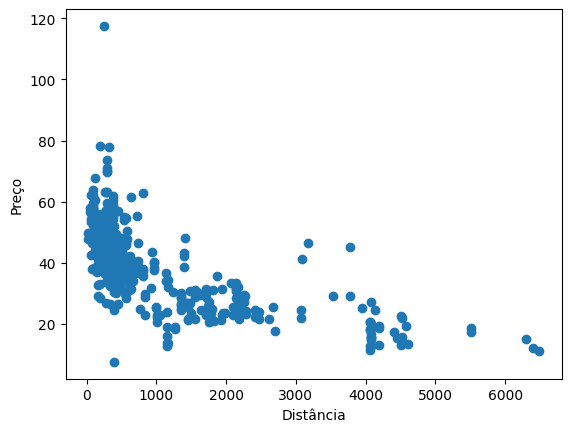

In [ ]:
plt.scatter(x=real_estate_data.iloc[:,3], y=real_estate_data.iloc[:,7])
plt.xlabel("Distância")
plt.ylabel("Preço")

## Linear regression utilizando [scikit-learn](https://scikit-learn.org/stable/)

Vamos importar o módulo `linear_model` e instanciar uma regressão linear


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Precisamos manipular nossos dados para utilizar o scikit-learn, uma vez que o método `fit` recebe, como entrada arrays numpy de duas dimensões. Caso se utilize mais do que duas variáveis preditoras, deve-se remover o trecho `.reshape(-1,1)`

[Referência]( https://stackoverflow.com/questions/61367841/why-does-the-fit-method-in-sklearns-linearregression-only-accept-2d-array-for-t)

In [ ]:
#X = np.asarray(real_estate_data.iloc[:,2]).reshape(-1,1)
re_train, re_test = train_test_split(real_estate_data, train_size=0.7)
X_train = re_train.iloc[:,[2,3]]
y_train = re_train.iloc[:,-1]

X_test = re_test.iloc[:,[2,3]]
y_test = re_test.iloc[:,-1]

In [ ]:
X_train.head()

,X2 house age,X3 distance to the nearest MRT station
136,11.4,390.5684
339,1.7,329.9747
273,13.2,170.1289
384,16.1,4066.5870
245,7.5,639.6198


In [ ]:
reg = linear_model.LinearRegression()

Agora vamos realizar o `fit` do modelo, i.e., cálculo dos parâmetros do nosso modelo linear.

In [ ]:
reg.fit(X=X_train,y=y_train)

LinearRegression()

In [ ]:
reg.coef_

array([-0.2190725 , -0.00741044])

In [ ]:
reg.intercept_

49.959414785177195

Agora vamos avaliar a qualidade do nosso modelo

In [ ]:
from sklearn import metrics

In [ ]:
y_pred = reg.predict(X_test)

Vamos utilizar a métrica [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error).

In [ ]:
print('MSE',metrics.mean_squared_error(y_test,y_pred))

MSE 89.63648275107002


## Exercício

1. Testar combinações de variáveis para melhorar o desempenho do regressor do tutorial anterior;
1. Utilizar o dataset [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality).
  1. Baixar dados relativos a Vinhos Tintos e Brancos;
  1. Criar modelos de regressão linear para cada um dos tipos de vinhos;
  1. Unir os dois datasets (para unir datasets utiliza esse [link](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#concatenating-objects) como referência.
  1. Criar um modelo de regressão linear para o dataset unificado;

In [ ]:
#Instalar e importar bibliotecas
!pip install pandas scikit-learn numpy matplotlib seaborn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Baixar e carregar dados
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv --no-check-certificate
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv --no-check-certificate

red = pd.read_csv('winequality-red.csv', delimiter=';')
white = pd.read_csv('winequality-white.csv', delimiter=';')

print("Vinho Tinto:", red.shape)
print("Vinho Branco:", white.shape)
print("\nPrimeiras linhas do Vinho Tinto:")
print(red.head())

--2025-10-08 00:42:54--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-red.csv’

winequality-red.csv     [ <=>                ]  82.23K  --.-KB/s    in 0.1s    

2025-10-08 00:42:55 (714 KB/s) - ‘winequality-red.csv’ saved [84199]

--2025-10-08 00:42:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-white.csv’

winequality-white.c     [  <=>               ] 258.23K  1.08MB/s    in 0.2s    

2025-10-08

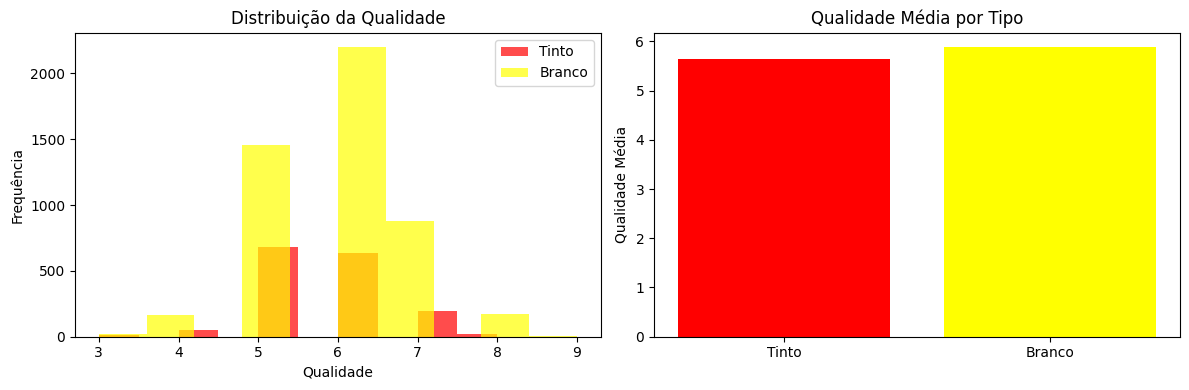

Qualidade média - Tinto: 5.64
Qualidade média - Branco: 5.88


In [ ]:
#Análise exploratória - Qualidade dos vinhos
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(red['quality'], alpha=0.7, label='Tinto', color='red')
plt.hist(white['quality'], alpha=0.7, label='Branco', color='yellow')
plt.xlabel('Qualidade')
plt.ylabel('Frequência')
plt.legend()
plt.title('Distribuição da Qualidade')

plt.subplot(1, 2, 2)
qualidade_media = [red['quality'].mean(), white['quality'].mean()]
nomes = ['Tinto', 'Branco']
plt.bar(nomes, qualidade_media, color=['red', 'yellow'])
plt.ylabel('Qualidade Média')
plt.title('Qualidade Média por Tipo')

plt.tight_layout()
plt.show()

print("Qualidade média - Tinto:", round(red['quality'].mean(), 2))
print("Qualidade média - Branco:", round(white['quality'].mean(), 2))

Correlação com qualidade - Vinho Tinto:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


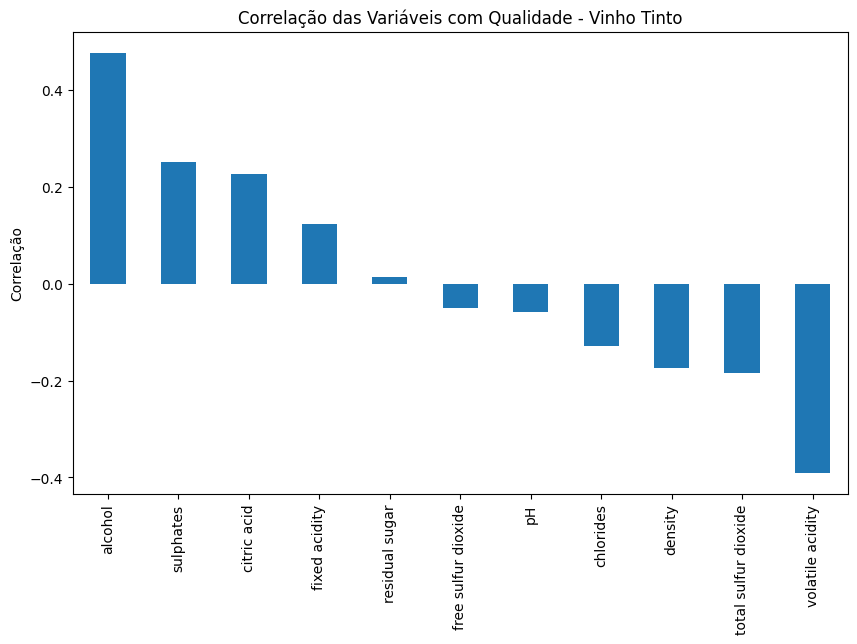

In [ ]:
#Correlação com qualidade - Vinho Tinto
correlacao_tinto = red.corr()['quality'].sort_values(ascending=False)
print("Correlação com qualidade - Vinho Tinto:")
print(correlacao_tinto)

plt.figure(figsize=(10, 6))
correlacao_tinto[1:].plot(kind='bar')  # Exclui a correlação com ela mesma
plt.title('Correlação das Variáveis com Qualidade - Vinho Tinto')
plt.ylabel('Correlação')
plt.show()

Correlação com qualidade - Vinho Branco:
quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


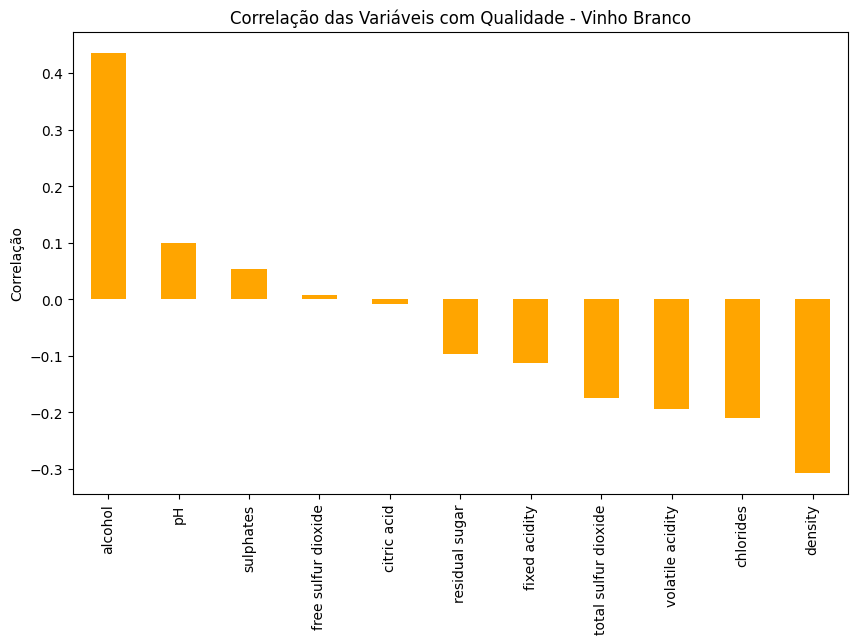

In [ ]:
#Correlação com qualidade - Vinho Branco
correlacao_branco = white.corr()['quality'].sort_values(ascending=False)
print("Correlação com qualidade - Vinho Branco:")
print(correlacao_branco)

plt.figure(figsize=(10, 6))
correlacao_branco[1:].plot(kind='bar', color='orange')
plt.title('Correlação das Variáveis com Qualidade - Vinho Branco')
plt.ylabel('Correlação')
plt.show()

In [ ]:
#Modelo com melhores variáveis - Vinho Tinto
#Selecionar variáveis mais correlacionadas
melhores_var_tinto = correlacao_tinto[1:4].index.tolist()  # Top 3 variáveis
print("Melhores variáveis para Vinho Tinto:", melhores_var_tinto)

X_tinto = red[melhores_var_tinto]
y_tinto = red['quality']

X_treino_t, X_teste_t, y_treino_t, y_teste_t = train_test_split(X_tinto, y_tinto, test_size=0.2, random_state=42)

modelo_tinto = LinearRegression()
modelo_tinto.fit(X_treino_t, y_treino_t)

y_pred_tinto = modelo_tinto.predict(X_teste_t)
print("Vinho Tinto - R2:", round(r2_score(y_teste_t, y_pred_tinto), 4))

Melhores variáveis para Vinho Tinto: ['alcohol', 'sulphates', 'citric acid']
Vinho Tinto - R2: 0.3132


In [ ]:
#Modelo com melhores variáveis - Vinho Branco
melhores_var_branco = correlacao_branco[1:4].index.tolist()  # Top 3 variáveis
print("Melhores variáveis para Vinho Branco:", melhores_var_branco)

X_branco = white[melhores_var_branco]
y_branco = white['quality']

X_treino_b, X_teste_b, y_treino_b, y_teste_b = train_test_split(X_branco, y_branco, test_size=0.2, random_state=42)

modelo_branco = LinearRegression()
modelo_branco.fit(X_treino_b, y_treino_b)

y_pred_branco = modelo_branco.predict(X_teste_b)
print("Vinho Branco - R2:", round(r2_score(y_teste_b, y_pred_branco), 4))

Melhores variáveis para Vinho Branco: ['alcohol', 'pH', 'sulphates']
Vinho Branco - R2: 0.203


In [ ]:
#Dataset combinado e análise
red['tipo'] = 'tinto'
white['tipo'] = 'branco'
wine_combined = pd.concat([red, white], ignore_index=True)

# Converter tipo para numérico
wine_combined['tipo_num'] = wine_combined['tipo'].map({'tinto': 0, 'branco': 1})

# Usar melhores variáveis de ambos os tipos
melhores_var_comb = list(set(melhores_var_tinto + melhores_var_branco + ['tipo_num']))
print("Variáveis para modelo combinado:", melhores_var_comb)

X_comb = wine_combined[melhores_var_comb]
y_comb = wine_combined['quality']

X_treino_c, X_teste_c, y_treino_c, y_teste_c = train_test_split(X_comb, y_comb, test_size=0.2, random_state=42)

modelo_comb = LinearRegression()
modelo_comb.fit(X_treino_c, y_treino_c)

y_pred_comb = modelo_comb.predict(X_teste_c)
print("Modelo Combinado - R2:", round(r2_score(y_teste_c, y_pred_comb), 4))

Variáveis para modelo combinado: ['tipo_num', 'alcohol', 'pH', 'citric acid', 'sulphates']
Modelo Combinado - R2: 0.2064


In [ ]:
#Comparação final e insights
resultados = {
    'Modelo': ['Tinto (3 vars)', 'Branco (3 vars)', 'Combinado'],
    'R2': [
        r2_score(y_teste_t, y_pred_tinto),
        r2_score(y_teste_b, y_pred_branco),
        r2_score(y_teste_c, y_pred_comb)
    ]
}

df_resultados = pd.DataFrame(resultados)
print("Comparação Final:")
print(df_resultados)

print("\nInsights:")
print("- Variáveis mais importantes para qualidade:")
print("  Tinto:", melhores_var_tinto)
print("  Branco:", melhores_var_branco)
print("- O álcool é importante para ambos os tipos")
print("- O modelo combinado aproveita padrões dos dois tipos")

Comparação Final:
            Modelo        R2
0   Tinto (3 vars)  0.313212
1  Branco (3 vars)  0.203000
2        Combinado  0.206439

Insights:
- Variáveis mais importantes para qualidade:
  Tinto: ['alcohol', 'sulphates', 'citric acid']
  Branco: ['alcohol', 'pH', 'sulphates']
- O álcool é importante para ambos os tipos
- O modelo combinado aproveita padrões dos dois tipos
